In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calls = pd.read_pickle('shared/Project-3_NYC_311_Calls.pkl')

In [3]:
calls = calls.set_index(pd.DatetimeIndex(calls['Created Date']))
del calls['Created Date']


In [4]:
calls.head()

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Open Data Channel Type
Created Date,,,,,,,,,,,
2011-04-06 00:00:00,20184537,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10002.0,NEW YORK,More than one complaint was received for this ...,MANHATTAN,UNKNOWN
2011-04-06 00:00:00,20184538,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11236.0,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,UNKNOWN
2011-04-06 00:00:00,20184539,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN
2022-07-08 11:14:43,54732265,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,10467.0,BRONX,The Department of Sanitation investigated this...,BRONX,PHONE
2011-04-06 00:00:00,20184540,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN


In [5]:
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33780977 entries, 2011-04-06 00:00:00 to 2011-04-06 00:00:00
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Unique Key              int64 
 1   Agency                  object
 2   Agency Name             object
 3   Complaint Type          object
 4   Descriptor              object
 5   Location Type           object
 6   Incident Zip            object
 7   City                    object
 8   Resolution Description  object
 9   Borough                 object
 10  Open Data Channel Type  object
dtypes: int64(1), object(10)
memory usage: 3.0+ GB


,Unique Key
count,3.378098e+07
mean,3.802665e+07
std,1.209574e+07
min,1.056422e+07
25%,2.793121e+07
50%,3.798303e+07
75%,4.830951e+07
max,5.840682e+07


In [8]:
# Count the unique types of complaints
complaint_types_count = calls['Complaint Type'].nunique()
print(f"Number of unique complaint types: {complaint_types_count}")

# # Display the unique complaint types
# unique_complaint_types = calls['Complaint Type'].unique()
# print("Unique Complaint Types:")
# print(unique_complaint_types)

# Read some descriptions of the complaints
sample_complaint_descriptions = calls['Descriptor'].sample(5).values
print("Sample Complaint Descriptions:")
print(sample_complaint_descriptions)

# Find the earliest and latest date
earliest_date = calls.index.min()
latest_date = calls.index.max()
print(f"Earliest Date: {earliest_date}")
print(f"Latest Date: {latest_date}")


Number of unique complaint types: 485
Sample Complaint Descriptions:
['Pothole' 'Loud Music/Party' 'HEAT' 'APARTMENT ONLY' 'Veh Signal Lamp']
Earliest Date: 2010-01-01 00:00:00
Latest Date: 2023-08-04 12:00:00


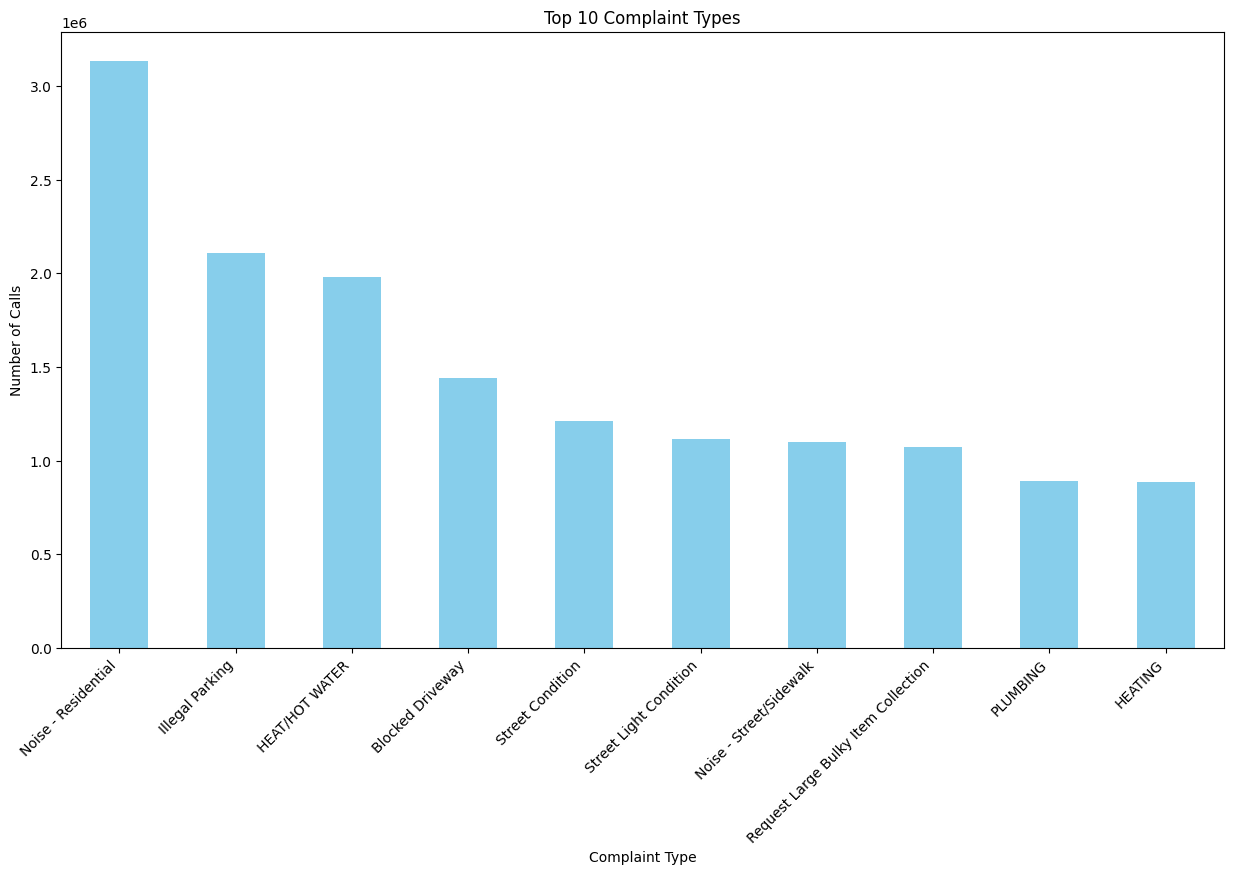

In [7]:
# Find the top 10 most common complaints
top_complaints = calls['Complaint Type'].value_counts().head(10)

# Visualize the distribution of the top 10 complaint types
plt.figure(figsize=(15, 8))
top_complaints.plot(kind='bar', color='skyblue')
plt.title('Top 10 Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.show()


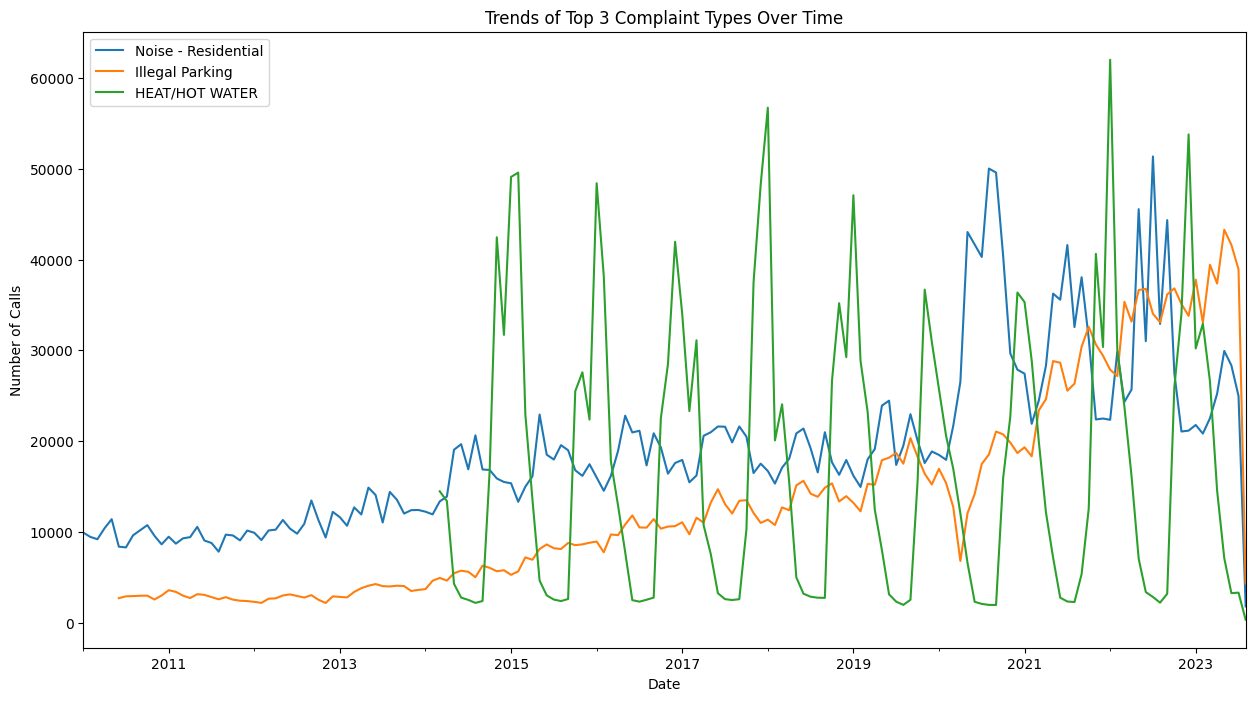

In [10]:
# Find the top 3 most common complaints
top3_complaints = calls['Complaint Type'].value_counts().head(3)

# Explore trends over time for the top 3 complaints
plt.figure(figsize=(15, 8))
for complaint_type in top3_complaints.index:
    calls[calls['Complaint Type'] == complaint_type].resample('M').size().plot(label=complaint_type)

plt.title('Trends of Top 3 Complaint Types Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()


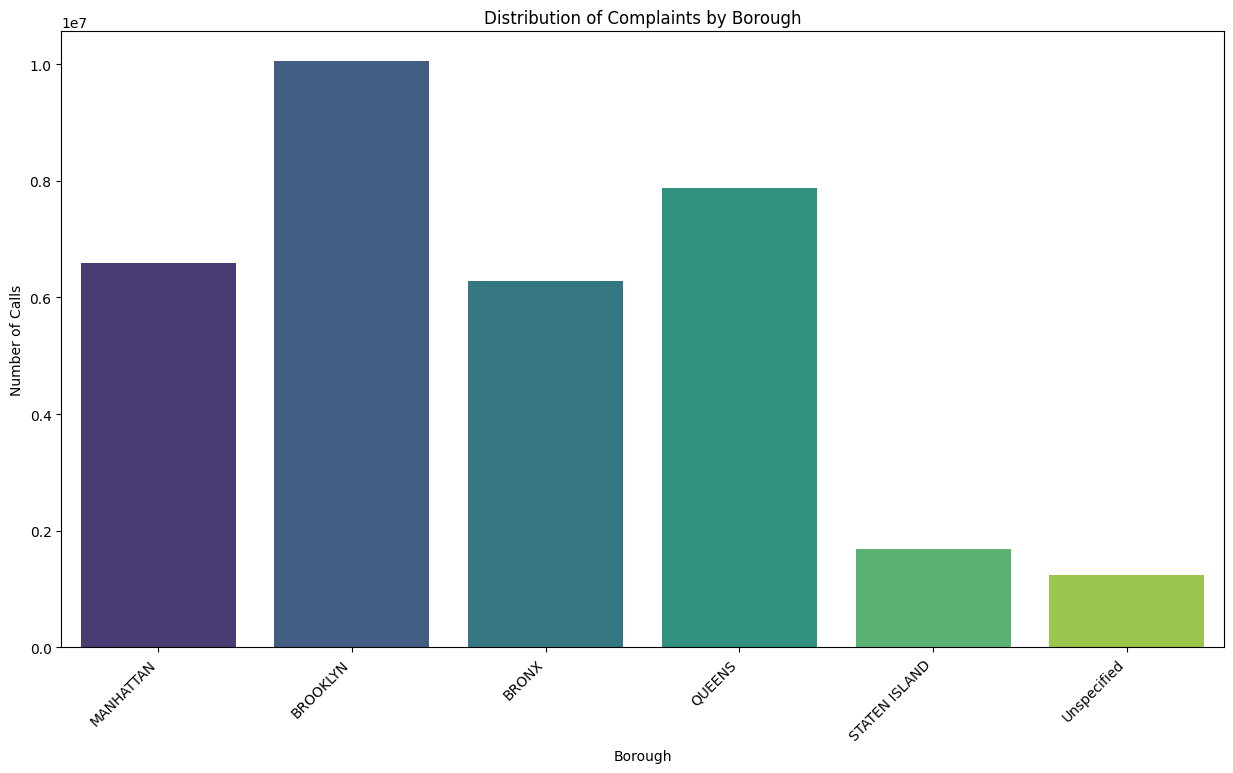

In [11]:
# Visualize the distribution of complaints by borough
plt.figure(figsize=(15, 8))
sns.countplot(x='Borough', data=calls, palette='viridis')
plt.title('Distribution of Complaints by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.show()


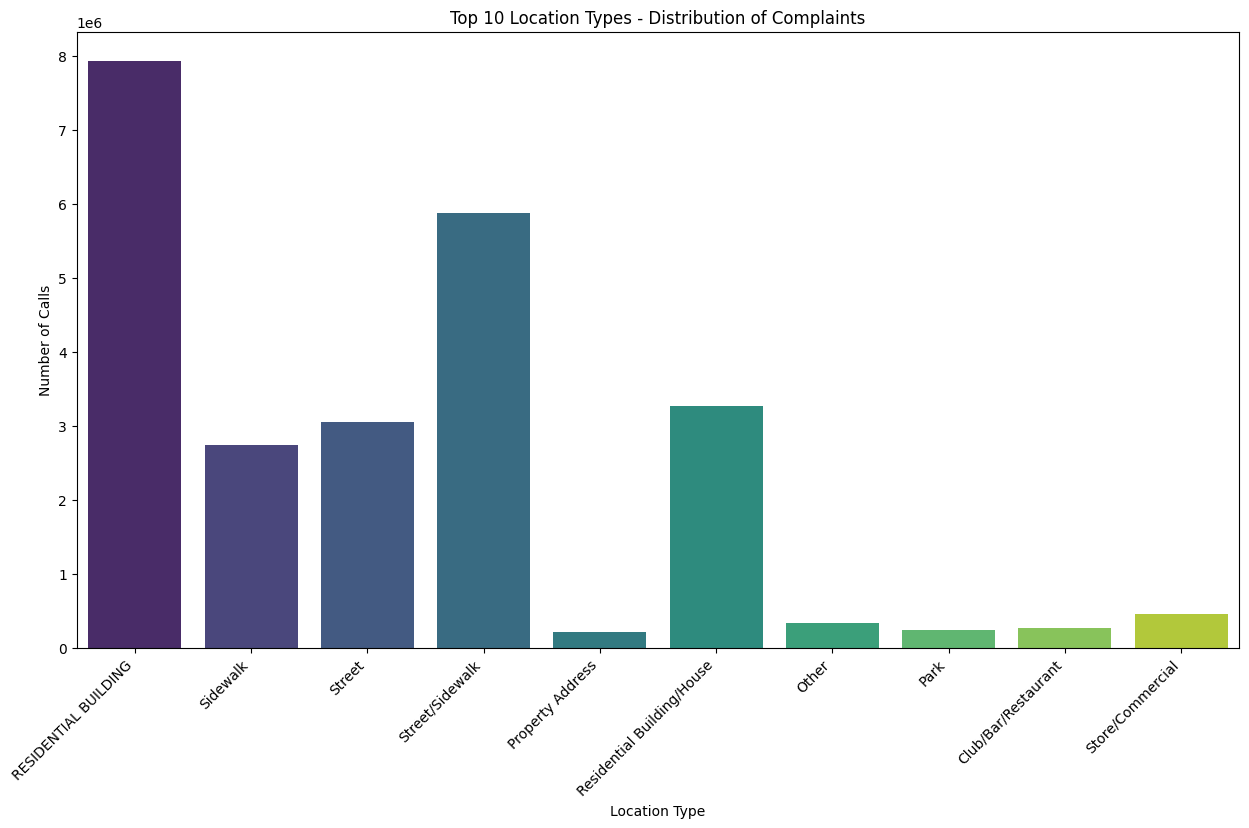

In [13]:
# Find the top 10 most common location types
top10_location_types = calls['Location Type'].value_counts().head(10)

# Visualize the distribution of complaints by the top 10 location types
plt.figure(figsize=(15, 8))
sns.countplot(x='Location Type', data=calls[calls['Location Type'].isin(top10_location_types.index)], palette='viridis')
plt.title('Top 10 Location Types - Distribution of Complaints')
plt.xlabel('Location Type')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.show()


In [4]:
# Q1
# Resample by day and count the number of unique keys
daily_complaints_2022 = calls['Unique Key']['2022'].resample('D').count()

# Calculate the average
average_daily_complaints_2022 = daily_complaints_2022.mean()

print(f"Average number of daily complaints received in 2022: {average_daily_complaints_2022:.0f}")

Average number of daily complaints received in 2022: 8684


In [5]:
# Q2
# Find the date with the maximum number of calls
max_calls_date = calls['Unique Key'].resample('D').size().idxmax()

print(f"Date with the maximum number of calls: {max_calls_date}")


Date with the maximum number of calls: 2020-08-04 00:00:00


In [6]:
# Q3
# Filter the data for the specific date
complaints_on_2020_08_04 = calls[calls.index.date == pd.to_datetime('2020-08-04').date()]

# Find the most common complaint type on that date
most_common_complaint_type = complaints_on_2020_08_04['Complaint Type'].value_counts().idxmax()

print(f"Most important complaint type on 2020-08-04: {most_common_complaint_type}")


Most important complaint type on 2020-08-04: Damaged Tree


In [7]:
# Q4
# Group the data by month and count the number of calls for each month
monthly_call_counts = calls['Unique Key'].resample('M').size()

# Identify the month with the fewest calls
quietest_month = monthly_call_counts.idxmin().strftime('%b')

print(f"Quietest month historically: {quietest_month}")


Quietest month historically: Aug


In [8]:
# Q5
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the series to a daily frequency
daily_series = calls['Unique Key'].resample('D').count()

# Perform ETS decomposition based on an additive model
result = seasonal_decompose(daily_series, model='additive')

# Get the seasonal component value on 2020-12-25, rounded to the nearest integer
seasonal_component = result.seasonal['2020-12-25'].round()
print(f"Seasonal component on 2020-12-25: {seasonal_component}")

Seasonal component on 2020-12-25: 183.0


In [9]:
# Q6
# Calculate autocorrelation with lag of 1
autocorr_lag1 = daily_series.autocorr(lag=1)

print(f"Autocorrelation with lag of 1: {autocorr_lag1:.2f}")


Autocorrelation with lag of 1: 0.75


In [10]:
# Q7
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data for Prophet
prophet_df = pd.DataFrame({'ds': daily_series.index, 'y': daily_series.values})

# Split the data into training and test sets
train_size = len(prophet_df) - 90
train_data = prophet_df.iloc[:train_size]
test_data = prophet_df.iloc[train_size:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_data)

# Create a dataframe with future dates for prediction
future_dates = model.make_future_dataframe(periods=90)
# Make predictions for the future dates
forecast = model.predict(future_dates)

# Extract actual values from the test set
actual_values = test_data['y'].values
# Extract predicted values from the forecast
predicted_values = forecast['yhat'].iloc[train_size:].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f"RMSE on the test set: {rmse:.0f}")


21:08:09 - cmdstanpy - INFO - Chain [1] start processing
21:08:11 - cmdstanpy - INFO - Chain [1] done processing


RMSE on the test set: 1232


In [11]:
monthly_call_counts

Created Date
2010-01-31    187735
2010-02-28    164427
2010-03-31    205037
2010-04-30    168873
2010-05-31    163173
               ...  
2023-04-30    247467
2023-05-31    281055
2023-06-30    267229
2023-07-31    289210
2023-08-31     28570
Freq: M, Name: Unique Key, Length: 164, dtype: int64